In [206]:
# Milestone 2
# Importing libraries and loading the data by using a command

# Identify Outliers through an IQR score
from __future__ import print_function, division

from scipy import stats
from scipy.stats import spearmanr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thinkplot
import thinkstats2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
#os.getcwd()
os.chdir('/Users/ryangough/Documents/GitHub/Data-Wrangling-with-Python') # change in working directory

import sys
sys.path.append('/Users/ryangough/Documents/GitHub/Data-Wrangling-with-Python/Lesson05/Activity07')

In [3]:
# Opening the csv by using the command


df = pd.read_csv("/Users/ryangough/Documents/GitHub/covid-19-data/public/data/ecdc/full_data.csv")
df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2019-12-31,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). 
# Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).

In [4]:
Afghanistan_df = df[df['location'].isin(['Afghanistan'])] # Created a new dataframe with the relevant locations 
United_States_df = df[df['location'].isin(['United States'])]
United_Kingdom_df = df[df['location'].isin(['United Kingdom'])]
United_Arab_Emirates_df = df[df['location'].isin(['United Arab Emirates'])]
Russia_df = df[df['location'].isin(['Russia'])]
Brazil_df = df[df['location'].isin(['Brazil'])]
Peru_df = df[df['location'].isin(['Peru'])]
Ireland_df = df[df['location'].isin(['Ireland'])]
Israel_df = df[df['location'].isin(['Israel'])]
China_df = df[df['location'].isin(['China'])]

World_df = df[df['location'].isin(['World'])]

In [5]:
World_df

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
58275,2019-12-31,World,27.0,0.0,27.0,NaN,NaN,NaN,NaN,NaN
58276,2020-01-01,World,0.0,0.0,27.0,NaN,NaN,NaN,NaN,NaN
58277,2020-01-02,World,0.0,0.0,27.0,NaN,NaN,NaN,NaN,NaN
58278,2020-01-03,World,17.0,0.0,44.0,NaN,NaN,NaN,NaN,NaN
58279,2020-01-04,World,0.0,0.0,44.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
58605,2020-11-25,World,561704.0,12159.0,59903030.0,1410788.0,4132630.0,70483.0,8275937.0,135189.0
58606,2020-11-26,World,649666.0,12583.0,60552696.0,1423371.0,4156526.0,71978.0,8302092.0,137164.0
58607,2020-11-27,World,549900.0,10638.0,61102596.0,1434009.0,4065456.0,71906.0,8204493.0,138650.0
58608,2020-11-28,World,616139.0,10333.0,61718735.0,1444342.0,4001837.0,70245.0,8184803.0,138987.0


In [204]:
Israel_df

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
26906,2019-12-31,Israel,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
26907,2020-01-01,Israel,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
26908,2020-01-02,Israel,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
26909,2020-01-03,Israel,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
26910,2020-01-04,Israel,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
27236,2020-11-25,Israel,849.0,11.0,331179.0,2822.0,5317.0,87.0,10330.0,139.0
27237,2020-11-26,Israel,1138.0,4.0,332317.0,2826.0,5986.0,87.0,10991.0,126.0
27238,2020-11-27,Israel,1126.0,8.0,333443.0,2834.0,6036.0,92.0,11284.0,128.0
27239,2020-11-28,Israel,359.0,5.0,333802.0,2839.0,6054.0,95.0,11107.0,123.0


In [6]:
# Describe what the 5 variables mean in the dataset (Chapter 1).

# Each dataframe is seperated by Country as well as a combined dataframe for the world. Each data frame has the date, cases, and deaths. 

In [7]:
# Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

# I do believe that there are outliers and understanding the explosive nature of the pandemic with rates of exponential spreading, I would not be surprised if there are outliers. I choose to include them as it is a measurement of rates of transmission and goverment prevention efforts. 

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, 'Deaths through the Covid-19 Pandemic "World"')

Text(0.5, 0, 'Total Amount of Deaths')

Text(0, 0.5, 'Deaths per day')

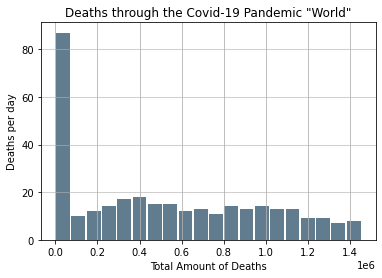

In [81]:
size, scale = 1000, 10
World = World_df['total_deaths']

World.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Deaths through the Covid-19 Pandemic "World"')
plt.xlabel('Total Amount of Deaths')
plt.ylabel('Deaths per day')
plt.grid(axis='y', alpha=0.75)

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, 'Deaths through the Covid-19 Pandemic "Afghanistan"')

Text(0.5, 0, 'Total Amount of Deaths')

Text(0, 0.5, 'Deaths per day')

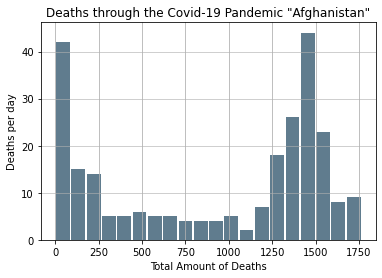

In [45]:
size, scale = 1000, 10
AFG = Afghanistan_df['total_deaths']

AFG.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Deaths through the Covid-19 Pandemic "Afghanistan"')
plt.xlabel('Total Amount of Deaths')
plt.ylabel('Deaths per day')
plt.grid(axis='y', alpha=0.75)

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, 'Deaths through the Covid-19 Pandemic "United States"')

Text(0.5, 0, 'Total Amount of Deaths')

Text(0, 0.5, 'Deaths per day')

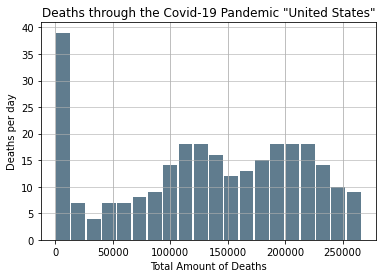

In [47]:
size, scale = 1000, 10
US = United_States_df['total_deaths']

US.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Deaths through the Covid-19 Pandemic "United States"')
plt.xlabel('Total Amount of Deaths')
plt.ylabel('Deaths per day')
plt.grid(axis='y', alpha=0.75)

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, 'Deaths through the Covid-19 Pandemic "United Kingdom"')

Text(0.5, 0, 'Total Amount of Deaths')

Text(0, 0.5, 'Deaths per day')

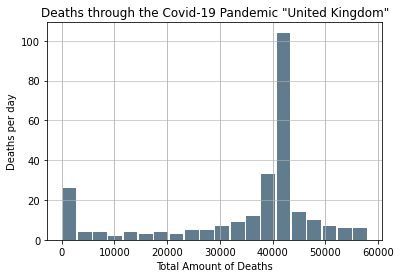

In [51]:
size, scale = 1000, 10
UK = United_Kingdom_df['total_deaths']

UK.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Deaths through the Covid-19 Pandemic "United Kingdom"')
plt.xlabel('Total Amount of Deaths')
plt.ylabel('Deaths per day')
plt.grid(axis='y', alpha=0.75)

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, 'Deaths through the Covid-19 Pandemic "United Arab Emirates"')

Text(0.5, 0, 'Total Amount of Deaths')

Text(0, 0.5, 'Deaths per day')

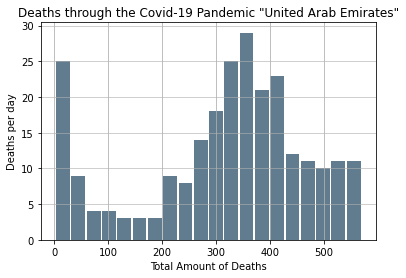

In [52]:
size, scale = 1000, 10
UAE = United_Arab_Emirates_df['total_deaths']

UAE.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Deaths through the Covid-19 Pandemic "United Arab Emirates"')
plt.xlabel('Total Amount of Deaths')
plt.ylabel('Deaths per day')
plt.grid(axis='y', alpha=0.75)

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, 'Deaths through the Covid-19 Pandemic "Russia"')

Text(0.5, 0, 'Total Amount of Deaths')

Text(0, 0.5, 'Deaths per day')

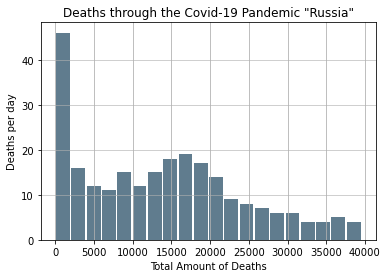

In [54]:
size, scale = 1000, 10
RS = Russia_df['total_deaths']

RS.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Deaths through the Covid-19 Pandemic "Russia"')
plt.xlabel('Total Amount of Deaths')
plt.ylabel('Deaths per day')
plt.grid(axis='y', alpha=0.75)

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, 'Deaths through the Covid-19 Pandemic "Brazil"')

Text(0.5, 0, 'Total Amount of Deaths')

Text(0, 0.5, 'Deaths per day')

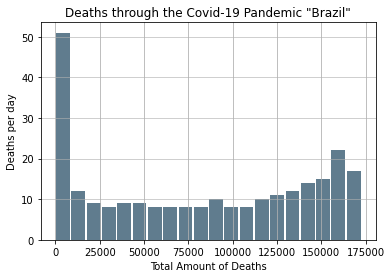

In [56]:
size, scale = 1000, 10
BR = Brazil_df['total_deaths']

BR.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Deaths through the Covid-19 Pandemic "Brazil"')
plt.xlabel('Total Amount of Deaths')
plt.ylabel('Deaths per day')
plt.grid(axis='y', alpha=0.75)

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, 'Deaths through the Covid-19 Pandemic "Peru"')

Text(0.5, 0, 'Total Amount of Deaths')

Text(0, 0.5, 'Deaths per day')

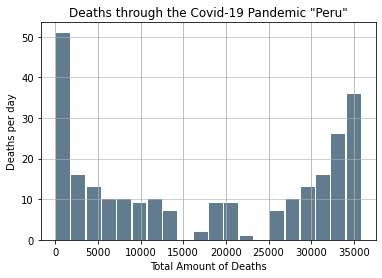

In [57]:
size, scale = 1000, 10
PR = Peru_df['total_deaths']

PR.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Deaths through the Covid-19 Pandemic "Peru"')
plt.xlabel('Total Amount of Deaths')
plt.ylabel('Deaths per day')
plt.grid(axis='y', alpha=0.75)

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, 'Deaths through the Covid-19 Pandemic "Ireland"')

Text(0.5, 0, 'Total Amount of Deaths')

Text(0, 0.5, 'Deaths per day')

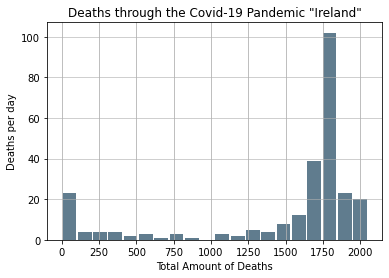

In [59]:
size, scale = 1000, 10
IR = Ireland_df['total_deaths']

IR.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Deaths through the Covid-19 Pandemic "Ireland"')
plt.xlabel('Total Amount of Deaths')
plt.ylabel('Deaths per day')
plt.grid(axis='y', alpha=0.75)

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, 'Deaths through the Covid-19 Pandemic "Israel"')

Text(0.5, 0, 'Total Amount of Deaths')

Text(0, 0.5, 'Deaths per day')

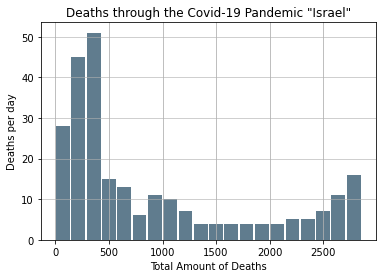

In [61]:
size, scale = 1000, 10
IS = Israel_df['total_deaths']

IS.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Deaths through the Covid-19 Pandemic "Israel"')
plt.xlabel('Total Amount of Deaths')
plt.ylabel('Deaths per day')
plt.grid(axis='y', alpha=0.75)

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, 'Deaths through the Covid-19 Pandemic "China"')

Text(0.5, 0, 'Total Amount of Deaths')

Text(0, 0.5, 'Deaths per day')

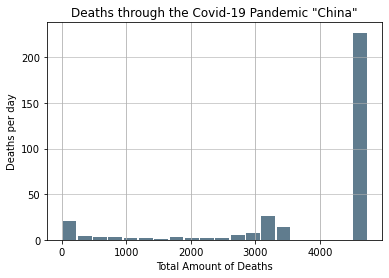

In [62]:
size, scale = 1000, 10
CH = China_df['total_deaths']

CH.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Deaths through the Covid-19 Pandemic "China"')
plt.xlabel('Total Amount of Deaths')
plt.ylabel('Deaths per day')
plt.grid(axis='y', alpha=0.75)

In [71]:
# Identify Outliers through an IQR score
WQ1 = World_df.quantile(0.25)
WQ3 = World_df.quantile(0.75)
WIQR = WQ3 - WQ1
print(WIQR)

new_cases            244763.50
new_deaths             4412.00
total_cases        26713286.50
total_deaths         857369.75
weekly_cases        1533646.00
weekly_deaths         24096.00
biweekly_cases      2962835.50
biweekly_deaths       40461.00
dtype: float64


In [72]:
print(World_df < (WQ1 - 1.5 * WIQR)) |(World_df > (WQ3 + 1.5 * WIQR))

       biweekly_cases  biweekly_deaths   date  location  new_cases  \
58275           False            False  False     False      False   
58276           False            False  False     False      False   
58277           False            False  False     False      False   
58278           False            False  False     False      False   
58279           False            False  False     False      False   
...               ...              ...    ...       ...        ...   
58605           False            False  False     False      False   
58606           False            False  False     False      False   
58607           False            False  False     False      False   
58608           False            False  False     False      False   
58609           False            False  False     False      False   

       new_deaths  total_cases  total_deaths  weekly_cases  weekly_deaths  
58275       False        False         False         False          False  
58276  

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

<AxesSubplot:>

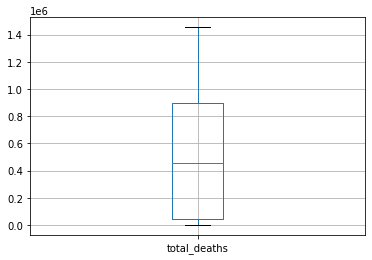

In [93]:
# Identify Outliers through a boxplot analysis
World_df.boxplot(column='total_deaths')

<AxesSubplot:>

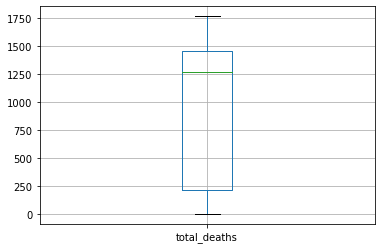

In [94]:
Afghanistan_df.boxplot(column='total_deaths')

<AxesSubplot:>

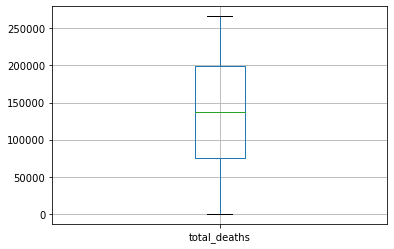

In [95]:
United_States_df.boxplot(column='total_deaths')

<AxesSubplot:>

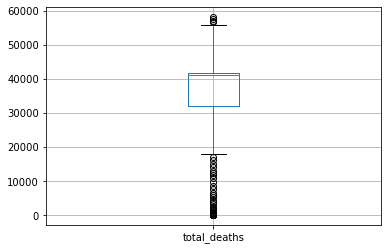

In [96]:
United_Kingdom_df.boxplot(column='total_deaths')

<AxesSubplot:>

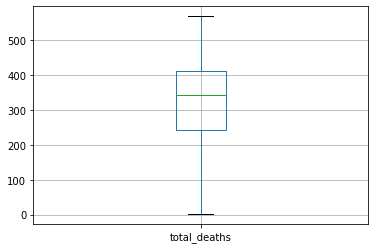

In [97]:
United_Arab_Emirates_df.boxplot(column='total_deaths')

<AxesSubplot:>

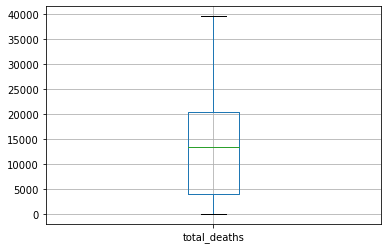

In [98]:
Russia_df.boxplot(column='total_deaths')

<AxesSubplot:>

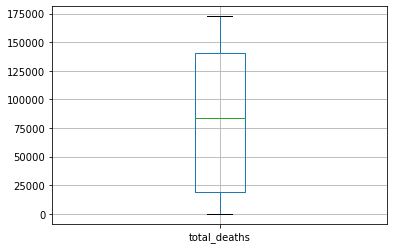

In [99]:
Brazil_df.boxplot(column='total_deaths')

<AxesSubplot:>

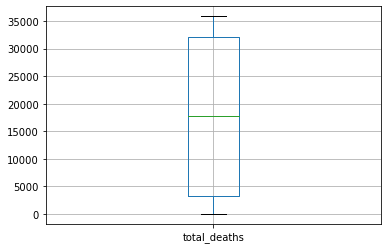

In [100]:
Peru_df.boxplot(column='total_deaths')

<AxesSubplot:>

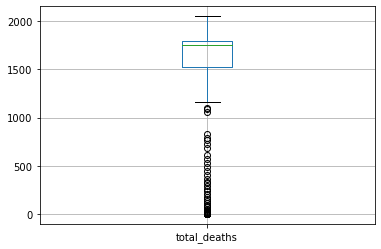

In [101]:
Ireland_df.boxplot(column='total_deaths')

<AxesSubplot:>

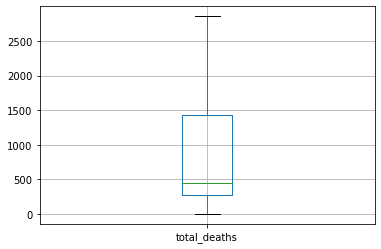

In [103]:
Israel_df.boxplot(column='total_deaths')

<AxesSubplot:>

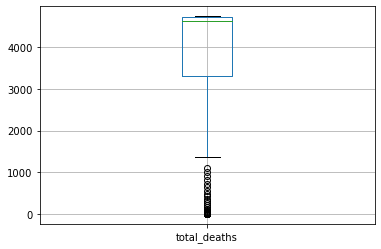

In [102]:
China_df.boxplot(column='total_deaths')

In [ ]:
# China, Ireland, and the United Kingdom have outliers. China's data is extremely poor, and does not provide much data which would explain the outliers near the 0 terminus. 
# Although there is more data for the United Kingdom, and Ireland. 
# They also trend down to 0, indicating that the amount of deaths that occured happened toward the tail end of 2020. Which is not surprising as the pandemic was nearing its peak. 
# The outliers will be kept as they represent the uneven distribution of deaths. 

In [ ]:
# Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [105]:
World_df[["total_deaths"]].describe()

Afghanistan_df[["total_deaths"]].describe()

,total_deaths
count,3.240000e+02
mean,5.215177e+05
std,4.457501e+05
min,1.000000e+00
25%,4.227750e+04
50%,4.596475e+05
75%,8.996472e+05
max,1.453531e+06


,total_deaths
count,251.000000
mean,921.314741
std,617.389971
min,1.000000
25%,218.500000
50%,1269.000000
75%,1453.000000
max,1763.000000


In [111]:
Combined_Countries1 = [Afghanistan_df, United_States_df, United_Kingdom_df, United_Arab_Emirates_df, Russia_df,
                     Brazil_df, Peru_df, Ireland_df, Israel_df, China_df]

Combined_Countries = pd.concat(Combined_Countries1)

In [112]:
Summary_Stats_Countries = Combined_Countries.groupby(["location"])[["total_deaths"]].describe()
Summary_Stats_Countries

total_deaths                                              \
                            count           mean           std  min       25%   
location                                                                        
Afghanistan                 251.0     921.314741    617.389971  1.0    218.50   
Brazil                      257.0   81807.669261  60271.115432  1.0  18859.00   
China                       324.0    3892.709877   1427.856300  1.0   3309.75   
Ireland                     263.0    1483.577947    605.804752  1.0   1525.50   
Israel                      254.0     919.791339    900.768780  1.0    279.00   
Peru                        255.0   17450.023529  13751.896471  2.0   3196.00   
Russia                      248.0   13736.455645  10531.586361  2.0   3927.75   
United Arab Emirates        253.0     312.861660    155.705386  2.0    244.00   
United Kingdom              268.0   34660.339552  14959.554251  1.0  32039.50   
United States               274.0  132556.711679  79343.854708  1.0  76047.50   

                                                     
                           50%        75%       max  
location                                             
Afghanistan             1269.0    1453.00    1763.0  
Brazil                 84082.0  140537.00  172561.0  
China                   4638.5    4733.00    4739.0  
Ireland                 1753.0    1795.50    2050.0  
Israel                   452.5    1432.00    2854.0  
Peru                   17843.0   32089.50   35879.0  
Russia                 13429.0   20339.25   39527.0  
United Arab Emirates     343.0     411.00     569.0  
United Kingdom         40979.5   41834.25   58030.0  
United States         136942.5  199788.00  266063.0

In [ ]:
# Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. 
# Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. 
# Almost like a filter. 
# The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

In [116]:
World_pmf = thinkstats2.Pmf(World_df['total_deaths'])
China_pmf = thinkstats2.Pmf(China_df['total_deaths'])

No handles with labels found to put in legend.


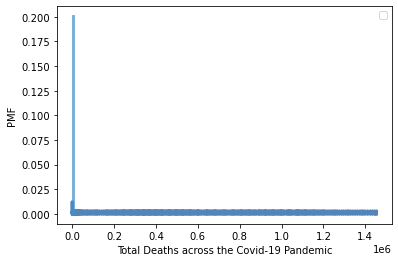

In [121]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([World_pmf, China_pmf])
thinkplot.Config(xlabel='Total Deaths across the Covid-19 Pandemic', ylabel='PMF')

In [ ]:
# Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

In [169]:
#live, firsts, others = first.MakeFrames()
China_deaths = China_df.total_deaths
China_cases = China_df.total_cases
China_deaths_dropna = China_deaths.dropna()
China_cases_dropna = China_cases.dropna()
print('China_df', len(China_deaths), len(China_deaths_dropna))
print('China_df', len(China_cases), len(China_cases_dropna))
 
World_deaths = World_df.total_deaths
World_deaths_dropna = World_deaths.dropna()
print('World_df', len(World_deaths), len(World_deaths_dropna))

China_pmf = thinkstats2.Pmf(China_deaths_dropna, label='China')
World_pmf = thinkstats2.Pmf(World_deaths_dropna, label='World')

China_df 335 324
China_df 335 335
World_df 335 324


In [133]:
China_cdf = thinkstats2.Cdf(China_df.total_deaths, label='China')

China_cdf.PercentileRank(4700) 
# With a value set at 4700, ~70% of the total deaths occured in China. This low death rate is due to either misinformation, or extreme and careful govermental intervention. 

66.9753086419753

In [134]:
World_cdf = thinkstats2.Cdf(World_df.total_deaths, label='World')

World_cdf.PercentileRank(4700) # At the same value, the World death count was ~19%. 

19.1358024691358

In [ ]:
# Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

In [149]:
China_df.head()
China_df.date

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
11487,2019-12-31,China,27.0,0.0,27.0,NaN,NaN,NaN,NaN,NaN
11488,2020-01-01,China,0.0,0.0,27.0,NaN,NaN,NaN,NaN,NaN
11489,2020-01-02,China,0.0,0.0,27.0,NaN,NaN,NaN,NaN,NaN
11490,2020-01-03,China,17.0,0.0,44.0,NaN,NaN,NaN,NaN,NaN
11491,2020-01-04,China,0.0,0.0,44.0,NaN,NaN,NaN,NaN,NaN


11487    2019-12-31
11488    2020-01-01
11489    2020-01-02
11490    2020-01-03
11491    2020-01-04
            ...    
11817    2020-11-25
11818    2020-11-26
11819    2020-11-27
11820    2020-11-28
11821    2020-11-29
Name: date, Length: 335, dtype: object

{'xscale': 'linear', 'yscale': 'linear'}

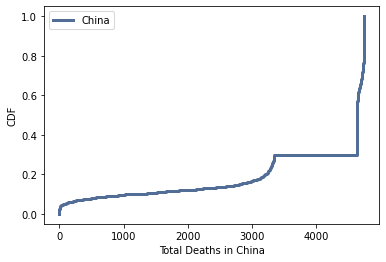

In [153]:
thinkplot.Cdf(China_cdf)
thinkplot.Config(xlabel='Total Deaths in China', ylabel='CDF')

{'xscale': 'linear', 'yscale': 'linear'}

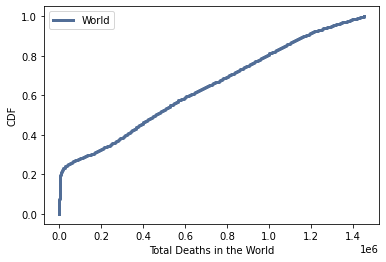

In [154]:
thinkplot.Cdf(World_cdf)
thinkplot.Config(xlabel='Total Deaths in the World', ylabel='CDF')

In [ ]:
# Comparing the both the graphs, the World data tends to have a more evenly distributed data. 
# While China's deaths as a probability through the pandemic becomes extremely likely towards the tail end of 2020. 
# This different than the world as the probability of death increases gradually through the lifetime of the pandemic. 

In [ ]:
# Create two scatter plots comparing two variables and provide your analysis on correlation and causation. 
# Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

# Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

<AxesSubplot:xlabel='total_cases'>

<AxesSubplot:xlabel='total_cases'>

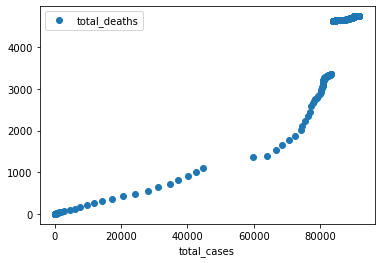

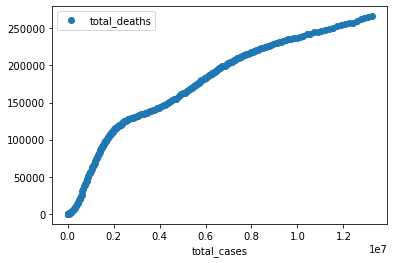

In [158]:
China_df.plot(x='total_cases', y='total_deaths', style='o')
United_States_df.plot(x='total_cases', y='total_deaths', style='o')

In [171]:
data1 = China_df.total_cases

data2 = China_df.total_deaths

coef, p = spearmanr(data1, data2)
print('Spearmans Correlation coefficient: %.3f' % coef)

alpha = 0.05

if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (Reject H0) p=%3.f' % p)

Spearmans Correlation coefficient: nan
Samples are correlated (Reject H0) p=nan


In [ ]:
def SpearmanCorr(xs, ys):
        xranks = pandas.Series(xs).rank()
        yranks = pandas.Series(ys).rank()
        return Corr(xranks, yranks)

def SpearmanCorr(xs, ys):
        xranks = pandas.Series(xs)
        yranks = pandas.Series(ys)
        return xs.corr(ys, method='spearman')

In [ ]:
# Since the values of the ith or jth variable do not vary, then the respective standard deviation is zero and so will the denominator of the fraction. 
# Thus, the correlation will be NaN. 
# To me, there is a basic lack of general information from China. However, if we assumed the data was complete. Then the scatterplot indicates that there is a lower correlation between cases vs. deaths. 
# Which means, although people are infected, they are not dying from Covid-19 in China. 

In [ ]:
# Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [196]:
class CorrelationPermute(thinkstats2.HypothesisTest):
        def TestStatistic(self, data):
            xs, ys = data
            test_stat = abs(thinkstats2.Corr(xs, ys))
            return test_stat
        def RunModel(self):
            xs, ys = self.data
            xs = np.random.permutation(xs)
            return xs, ys

In [199]:
#live, firsts, others = first.MakeFrames()
live = China_df.dropna(subset=['total_deaths', 'total_cases'])
data = China_df.total_deaths.values, China_df.total_cases.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue
# There is a correlation of 0 between both the total deaths and total cases in China. 

0.0

In [201]:
#live, firsts, others = first.MakeFrames()
live = United_States_df.dropna(subset=['total_deaths', 'total_cases'])
data = United_States_df.total_deaths.values, United_States_df.total_cases.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue
# There is a correlation of 0 between both the total deaths and total cases in the United States. 

0.0

In [ ]:
# For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [205]:
United_States_df
Russia_df
United_Kingdom_df

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
56031,2019-12-31,United States,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
56032,2020-01-01,United States,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
56033,2020-01-02,United States,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
56034,2020-01-03,United States,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
56035,2020-01-04,United States,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
56361,2020-11-25,United States,170293.0,2224.0,12591165.0,259925.0,1231363.0,11238.0,2333339.0,20242.0
56362,2020-11-26,United States,186589.0,2341.0,12777754.0,262266.0,1247947.0,11729.0,2376622.0,20466.0
56363,2020-11-27,United States,106091.0,1189.0,12883845.0,263455.0,1166018.0,10900.0,2329044.0,21025.0
56364,2020-11-28,United States,207913.0,1404.0,13091758.0,264859.0,1177814.0,10446.0,2352144.0,20514.0


,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
44262,2019-12-31,Russia,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
44263,2020-01-01,Russia,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
44264,2020-01-02,Russia,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
44265,2020-01-03,Russia,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
44266,2020-01-04,Russia,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
44592,2020-11-25,Russia,23675.0,507.0,2162503.0,37538.0,170505.0,3151.0,345394.0,6377.0
44593,2020-11-26,Russia,25487.0,524.0,2187990.0,38062.0,172382.0,3212.0,351030.0,6469.0
44594,2020-11-27,Russia,27543.0,496.0,2215533.0,38558.0,175607.0,3247.0,356965.0,6526.0
44595,2020-11-28,Russia,27100.0,510.0,2242633.0,39068.0,177885.0,3290.0,362082.0,6625.0


,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
55696,2019-12-31,United Kingdom,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
55697,2020-01-01,United Kingdom,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
55698,2020-01-02,United Kingdom,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
55699,2020-01-03,United Kingdom,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
55700,2020-01-04,United Kingdom,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
56026,2020-11-25,United Kingdom,11299.0,608.0,1538794.0,55838.0,128062.0,3093.0,305019.0,6068.0
56027,2020-11-26,United Kingdom,18213.0,695.0,1557007.0,56533.0,126666.0,3259.0,300282.0,6168.0
56028,2020-11-27,United Kingdom,17555.0,498.0,1574562.0,57031.0,121306.0,3256.0,284367.0,6103.0
56029,2020-11-28,United Kingdom,14739.0,520.0,1589301.0,57551.0,115793.0,3265.0,271805.0,6247.0


In [208]:
import statsmodels.formula.api as smf # Importing statsmodel to create the model for total_deaths as a function 

formula = 'total_deaths ~ total_cases'
model = smf.ols(formula, data=United_States_df)
results = model.fit()
results.summary()

formula = 'total_deaths ~ total_cases'
model = smf.ols(formula, data=Russia_df)
results = model.fit()
results.summary()

formula = 'total_deaths ~ total_cases'
model = smf.ols(formula, data=United_Kingdom_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_deaths   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     2478.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):          1.17e-138
Time:                        13:51:24   Log-Likelihood:                -3162.5
No. Observations:                 274   AIC:                             6329.
Df Residuals:                     272   BIC:                             6336.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.139e+04   2374.055     17.433      0.000    3.67e+04    4.61e+04
total_cases     0.0214      0.000     49.775      0.000       0.021       0.022
==============================================================================
Omnibus:                       45.424   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.379
Skew:                          -0.745   Prob(JB):                     5.65e-08
Kurtosis:                       2.162   Cond. No.                     8.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_deaths   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 4.438e+04
Date:                Fri, 05 Mar 2021   Prob (F-statistic):          7.73e-280
Time:                        13:51:24   Log-Likelihood:                -2003.5
No. Observations:                 248   AIC:                             4011.
Df Residuals:                     246   BIC:                             4018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1324.5672     87.097    -15.208      0.000   -1496.118   -1153.016
total_cases     0.0181   8.58e-05    210.675      0.000       0.018       0.018
==============================================================================
Omnibus:                       40.120   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.461
Skew:                          -0.264   Prob(JB):                      0.00197
Kurtosis:                       2.037   Cond. No.                     1.78e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_deaths   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     244.7
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.50e-39
Time:                        13:51:24   Log-Likelihood:                -2868.7
No. Observations:                 268   AIC:                             5741.
Df Residuals:                     266   BIC:                             5749.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.357e+04    969.288     24.315      0.000    2.17e+04    2.55e+04
total_cases     0.0274      0.002     15.641      0.000       0.024       0.031
==============================================================================
Omnibus:                       36.542   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.906
Skew:                          -1.041   Prob(JB):                     2.40e-11
Kurtosis:                       2.792   Cond. No.                     8.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# These are the results of the regression in which total deaths is measured against total cases. 
# For the United States with a P-Value of ~0.02% provides it is an accurate predictor of covid related death. 
# For Russia with a P-Value of ~0.018 it is also an accurate predictor of covid related deaths.
# For the United Kingdom which has a P-Value of 0.031 it is also a accurate predictor of covid related death. 